In [1]:

from plantbrain_fastml.managers.regressor_manager import RegressorManager
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import time
# Load California housing dataset as DataFrame for compatibility
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize manager and add models (if not already added)
manager = RegressorManager()
# (If RegressorManager already adds models in __init__, no need to add explicitly)
# Otherwise, you can add explicitly:
# manager.add_model("linear_regression", LinearRegressionRegressor())
# manager.add_model("random_forest", RandomForestRegressorWrapper())

# Evaluate all models on training data with hypertuning and feature elimination
time_start = time.time()
results = manager.evaluate_all(
    X_train, y_train,
    hypertune=True,
    hypertune_params={'n_trials': 2},
    n_jobs=6,  # Set to -1 for all cores
    cv_folds=5,
    test_size=0.1,
    feature_elimination=True,
    fe_n_features=5,
    fe_method='lasso',
    return_plots=True  # set True if you want plots
)

print("Evaluation Results (CV + Test):")
print(results)

# Get best model by metric (e.g., 'rmse')
best_model_name, best_model = manager.get_best_model(metric='rmse', higher_is_better=False)
print(f"\nBest model by RMSE: {best_model_name}")
time_end = time.time()

# Evaluate best model on the test set separately


c:\Users\Himanshu Ranjan\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Evaluation Results (CV + Test):
                   cv_rmse_mean  cv_rmse_std  cv_mae_mean  cv_mae_std  \
model                                                                   
linear_regression      0.804085     0.130024     0.547236    0.003277   
decision_tree          0.662151     0.015438     0.421433    0.007143   
knn_regression         0.626720     0.010723     0.434400    0.005269   
svr                    0.834017     0.008630     0.656536    0.004684   
gradient_boosting      0.504528     0.010760     0.342284    0.003108   
random_forest          0.515478     0.011206     0.333388    0.005093   

                   cv_r2_mean  cv_r2_std  test_rmse  test_mae   test_r2  
model                                                                    
linear_regression    0.500343   0.181534   0.717256  0.529131  0.620670  
decision_tree        0.670537   0.013651   0.636458  0.400013  0.701318  
knn_regression       0.704872   0.009787   0.619326  0.428844  0.717182  
svr          

In [2]:
print(f"Time taken for evaluation: {(time_end - time_start)//60} minutes")

Time taken for evaluation: 2.0 minutes


In [6]:
manager.get_hyperparameters()

{'linear_regression': {'fit_intercept': True}}

In [14]:
import matplotlib
print(matplotlib.__version__)


3.10.0


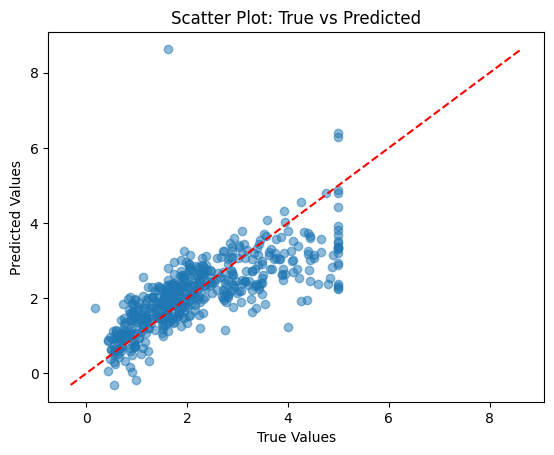

In [10]:
manager.get_plots()['linear_regression']['scatter']

In [12]:
manager.eval_results

{'cv_scores': {'rmse': (np.float64(0.8040853634139525),
   np.float64(0.1300242365136351)),
  'mae': (np.float64(0.5472359711631587), np.float64(0.003277065357366334)),
  'r2': (np.float64(0.5003432933141967), np.float64(0.1815338559505305))},
 'test_scores': {'rmse': np.float64(0.717256211776781),
  'mae': 0.5291309251606496,
  'r2': 0.6206697989665664},
 'plots': {'line': <Figure size 640x480 with 1 Axes>,
  'scatter': <Figure size 640x480 with 1 Axes>}}